### <u>Single Layer Neural Networks</u>

A neural network takes an input vector of $p$ variables $X = (X_1, X_2, X_3, ... , X_p)$ and builds a non-linear function $f(X)$ to predict the response $Y$.

#### <u>A simple feed-forward neural network</u>

Here we will develop a feed-forward network for modelling a quantitative response. The features $X_1, X_2, X_3, X_4$ make up the units in the input layer. We choose $K=5$ as the number of hidden units in the hidden layer. Then the neural network model has the form,
$$
f(X) = \beta_0 + \sum_{k=1}^{K} \beta_k h_k (X) \\[0.2cm]
= \beta_0 + \sum_{k=1}^{K} \beta_k g(w_k0 + \sum_{j=1}^{p} w_{kj} X_j)
$$

It is built up here in two steps. First $K$ activations $A_k, k = 1,2,...,K$ in the hidden layer are computed as functions of the input features $X_1, X_2, ..., X_p$,

$$
A_k = h_{k}(X) = g(w_{k0} + \sum_{j=1}^{p} w_{kj} X_j)
$$

where g(z) is a non-linear function specified in advance. These $K$ activations from the hidden layer then feed into the output layer, resulting in,

$$
f(X) = \beta_0 + \sum_{k=1}^{K} \beta_k A_k
$$

which is a linear regression model in $K = 5$ activations. All the parameters $\beta_0, ... , \beta_k$ and $w_{10}, ... , w_{Kp}$ need to be estimated from the data. 

Two popular activation functions are,

__Sigmoid Activation Function:__
$$
g(z) = \frac{e^{z}}{1 + e^{z}} = \frac{1}{1 + e^{-z}}
$$
__ReLU (Rectified Linear Unit) Activation Function:__
$$ g(z)=   \left\{
\begin{array}{ll}
      0, \hspace{0.2cm} if \hspace{0.2cm} z \lt 0 \\
      z, \hspace{0.2cm} otherwise
\end{array} 
\right.  $$

The non-linearity in the activation functions $g(z)$ is essential, since without it the model $f(X)$ would collapse into a simple linear model in $X_1, X_2, ... , X_p$ . Morever, having a nonlinear activation function allows a model to capture complex nonlinearities and interaction effects.

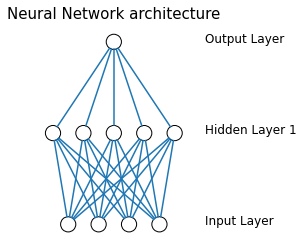

In [14]:
network = DrawNN([4,5,1])
network.draw()
# A visualiztion of the above model is given below for p = 4 and K = 5

#### <u>An Example</u>

Let us think of an example for $p = 2$, that is where we have two input variables $X = (X_1, X_2)$, and $K=2$ hidden units $h_1(X)$ and $h_2(X)$ and with $g(z) = z^{2}$, as our activation function. In practice a quadratic equation would never be used as an activation function as we would get second degree polynomials in the original coordinates $X_1$ and $X_2$. The sigmoid or ReLU functions do not have such limitations. This example is just for demonstration purposes.

We specify the other parameters as,
$$
\left\{
\begin{array}{ll}
\beta_0 = 0, \hspace{1cm} \beta_1 = \frac{1}{4}, \hspace{1cm} \beta_2 = \frac{-1}{4}, \\
w_{10} = 0, \hspace{1cm} w_{11} = 1, \hspace{1cm} w_{12} = 1, \\
w_{20} = 0, \hspace{1cm} w_{21} = 1, \hspace{1cm} w_{22} = -1 
\end{array}
\right\}
$$

Thus in this case,

$$
A_k = h_{k}(X) = g(w_{k0} + \sum_{j=1}^{p} w_{kj} X_j)
$$

gives us the functions,

$$
h_1(X) = (w_{10} + w_{11} X_1 + w_{12} X_2) \\
= (0 + X_1 + X_2)^{2} \\
\therefore h_1(X) = A_1(X) = (X_1 + X_2)^{2} \\[1cm]
h_2(X) = (w_{20} + w_{21} X_1 + w_{22} X_2) \\
=(0 + X_1 - X_2)^{2} \\
\therefore h_2(X) = A_2(X) = (X_1 - X_2)^{2} \\
$$

Plugging in these values into, 

$$
f(X) = \beta_0 + \sum_{k=1}^{K} \beta_k A_k
$$

we get our neural network model,
$$
f(X) = \beta_0 + \beta_1 A_1(X) + \beta_2 A_2(X) \\[0.2cm]
= 0 + \frac{1}{4} (X_1 + X_2)^{2} + (-\frac{1}{4}) (X_1 - X_2)^2 \\[0.2cm]
= \frac{1}{4} \Bigr[(X_1 + X_2)^{2} + (X_1 - X_2)^{2}\Bigr] \\[0.2cm]
= \frac{1}{4} \cdot 4 X_1 X_2 \\[0.2cm]
\therefore f(X) = X_1 X_2
$$

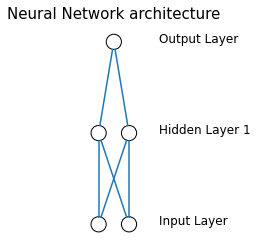

In [12]:
network = DrawNN([2,2,1])
network.draw()
# A visualiztion of the above model is given below

In [9]:
                                        # Code for visualizing Neural Networks
                                        # Reference: https://stackoverflow.com/questions/29888233/how-to-visualize-a-neural-network

from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()